# **I. INTRODUCTION**

Name: **Muhammad Fattahillah**

Project Objective: **Predicting Ride-Hailing Platform Trip Prices Using Machine Learning Linear Regression Models.**

Dataset: **Uber and Lyft Dataset Boston, MA**

Link: *https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma*

---

# **II. IMPORT LIBRARIES**

In creating a project in a Python notebook, the first thing that must be done is to import **or determine **features** from the library that we want to use later in the project. This process is carried out to ensure **features* * We can later run this during the data **analysis** process and the **machine learning model** creation process.

In [1]:
# Base:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Model
from sklearn.linear_model import LinearRegression

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Save mode
import joblib
import json

import warnings
warnings.filterwarnings('ignore')

# Change the options to be able to see all columns and rows in the output cells
pd.options.display.max_rows = None
pd.options.display.max_columns = None

***Insight:** The results above show that the features from the required library have been successfully imported. As a suggestion, don't just include these features, you must first know what the feature is for, so that the project doesn't take up too much memory and is more efficient.*

---

# **III. DATA LOADING**

After determining the features of the library that will be used in the project, the next step is to call/load the data that will be analyzed and create a machine learning model.

### **1. LOAD FILE**

This file is sourced from kaggle.com with the title *Uber and Lyft Dataset Boston, MA, with link: https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma.* For explanation and for further information regarding the data, you can click the link.

In [3]:
# Read the CSV file and define it as df:
df = pd.read_csv('rideshare_kaggle.csv')
df.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


***Insight:** From the results above, it shows that this dataset is travel data from ride-hailing companies Uber and Lyft (Gojek/Grab if in Indonesia) in the America/New York area. In it there are many columns that have information on time, price, vehicle type, weather, temperature, etc. The data shows lots of feature columns, but there is already a target column, namely 'price', which makes this dataset a Supervised type.*

### **2. DATASET SUMMARY**

After loading the file, now the data can be analyzed further. In this section we will briefly look at the data.

In [4]:
# Melihat summary dari dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

***Insight:** From the results above it shows that this dataset has 693,071 entries with a total of 57 columns. Missing Value is only in the price column. In terms of data types, there are a total of 29 columns with float (numerical) data type, 17 columns with int (numerical) data type, and 11 columns with object (categorical) data type.*

---

# **IV. EXPLORATORY DATA ANALYSIS (EDA)**

After carrying out a brief analysis of the data, now a more in-depth analysis will be carried out regarding:
1. Anomaly search: missing value / missing entry
2. Anomaly search: duplicate data / duplicate entries
3. Description of statistics regarding numeric columns
4. Looking at cardinality in categorical data (unique value)
5. Statistical description related to object/categorical data
6. Checking for outliers

### **1. MISSING VALUE CHECK**

In this analysis, missing values or missing entries will be checked in the data.

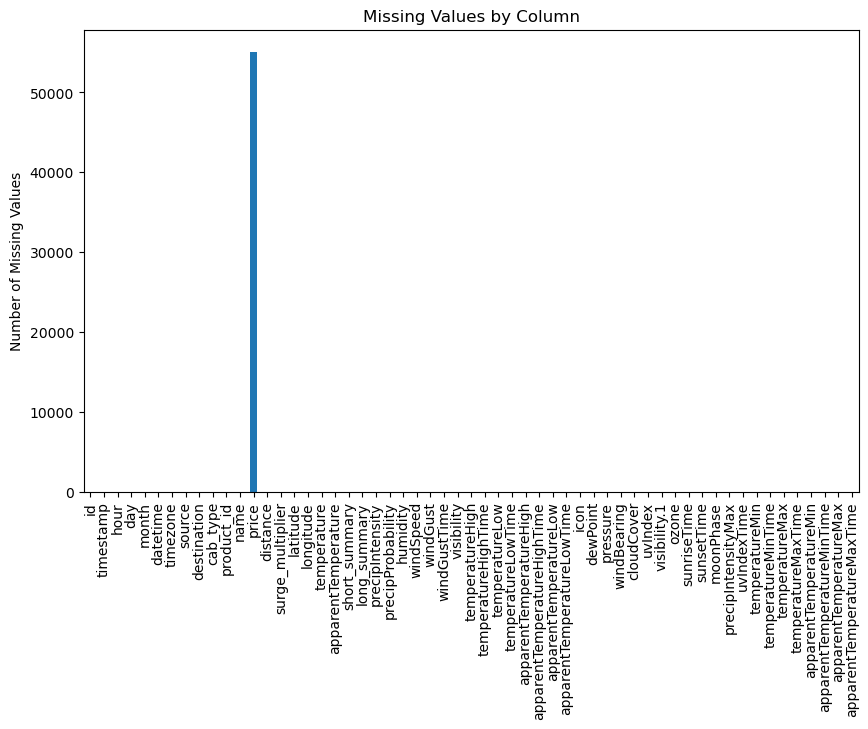

In [5]:
# Look for missing values from all the data and calculate them:
missing_values = df.isnull().sum()

# Create a bar plot visualization:
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values by Column')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

***Insight:** From the results above, it shows that the missing values are only found in the 'price' column, which is the column that is the target for carrying out the machine learning model later. These missing values must be deleted so that they do not interfere with the analysis and modeling process in the future.*

Deleting missing values contained in the data.

In [6]:
# Delete missing values contained in the data:
print('Sebelum menghapus missing value: ', df.shape)
df.dropna(inplace=True)
print('Sesudah menghapus missing value: ', df.shape)

Sebelum menghapus missing value:  (693071, 57)
Sesudah menghapus missing value:  (637976, 57)


***Insight:** From the results above it shows that missing values have been successfully removed, from data that previously amounted to 693,071 entries, now there are 637,976 entries.*

### **2. DUPLICATED DATA CHECK**

In this analysis, data duplication or duplicate entries in the data will be checked.

In [7]:
# Check for duplication based on all columns:
duplicates = df[df.duplicated()]

if duplicates.shape[0] > 0:
    print(f"Total {duplicates.shape[0]} entry duplikasi ditemukan.")
    print("Entry duplikasi:")
    print(duplicates)
else:
    print("Tidak ada entry yang duplikasi pada data ini.")

Tidak ada entry yang duplikasi pada data ini.


***Insight:** The results above show that this data is clean from duplicate entries.*

### **3. STATISTICS DESCRIPTIVE**

In this analysis, descriptive statistics will be checked for all the numerical columns in the data.

In [8]:
# View summary statistics from numeric columns in data:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.379760e+05,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.00000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,6.379760e+05,637976.000000,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,6.379760e+05,6.379760e+05,637976.000000,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05
mean,1.544046e+09,11.618528,17.797674,11.586550,16.545125,2.189261,1.015068,42.338161,-71.066144,39.582406,35.87844,0.008909,0.145941,0.741056,6.186795,8.470616,1.544049e+09,8.469180,45.039586,1.544050e+09,34.148928,1.544102e+09,41.612514,1.544050e+09,30.137973,1.544099e+09,31.652281,1010.092744,220.112705,0.686291,0.249031,8.469180,313.515634,1.544027e+09,1.544060e+09,0.579076,0.037369,1.544044e+09,33.456171,1.544042e+09,45.259945,1.544047e+09,29.729028,1.544048e+09,41.995876,1.544048e+09
std,6.892028e+05,6.948776,9.982083,0.492452,9.324359,1.135413,0.095422,0.047856,0.020303,6.725500,7.91726,0.026880,0.328776,0.138575,3.147856,5.288683,6.928507e+05,2.601828,5.996033,6.938211e+05,6.381731,6.923133e+05,7.665189,6.941980e+05,8.056278,6.927580e+05,9.141390,13.475580,99.087172,0.358599,0.474306,2.601828,27.951377,6.911634e+05,6.906875e+05,0.244674,0.055216,6.912268e+05,6.466349,6.902087e+05,5.644414,6.901597e+05,7.109907,6.872011e+05,6.935538,6.911036e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.13000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,36.450000,31.91000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.90000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.660000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000,42.364700,-71.054200,43.580000,40.01000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09,35.320

***Insight:** The results above show that this data is related to various variables such as time, price, distance, temperature, humidity, etc. Here, because the target column is 'price', the column can be elaborated like this for descriptive statistics:*
- *Mean: The average trip price based on existing data is approximately $16.54. Because the data source comes from the US, it can be concluded that the currency is USD.*
- *Std (Standard Deviation): This value shows how far the travel price values are spread from their average. The standard deviation is about $9.32, which means that the variation in travel prices in the data is quite large.*
- *Min: This is the lowest travel price recorded in the data, which is approximately $2.5.*
- *25%, 50%, 75%: These are the travel price percentiles in the data. For example, the first quartile (25%) of prices is around $9, which means 25% of travel prices are lower than this value. The median (50%) is around $13.5, meaning 50% of travel prices are lower than this value. The third quartile (75%) is around $22.5, meaning 75% of travel prices are lower than this value.*
- *Max: This is the highest travel price recorded in the data, which is approximately $97.5.*

### **4. CARDINALITY CHECK**

In this analysis, cardinality or unique values will be checked for each categorical column in the data.

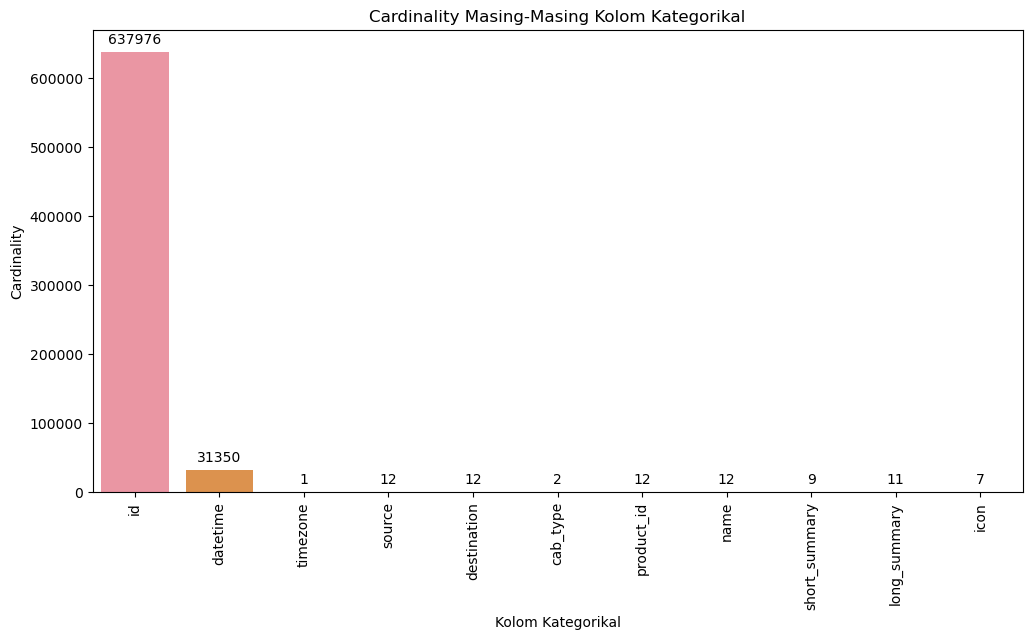

In [9]:
# Select only categorical columns:
categorical_columns = df.select_dtypes(include=['object']).columns

# Create visualization:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=categorical_columns, y=df[categorical_columns].nunique())
plt.xticks(rotation=90)
plt.xlabel('Kolom Kategorikal')
plt.ylabel('Cardinality')
plt.title('Cardinality Masing-Masing Kolom Kategorikal')

# Added cardinality number labels in each bar:
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

***Insight:** From the results above, it shows that the id and datetime columns have very many unique values, so that they will not be used as features in the feature selection that will be modeled. For the rest, it can look like the results above.*

### **5. DISTRIBUTION CHECK: CATEGORICAL DATA**

In this analysis, data distribution will be checked from columns with categorical data type.

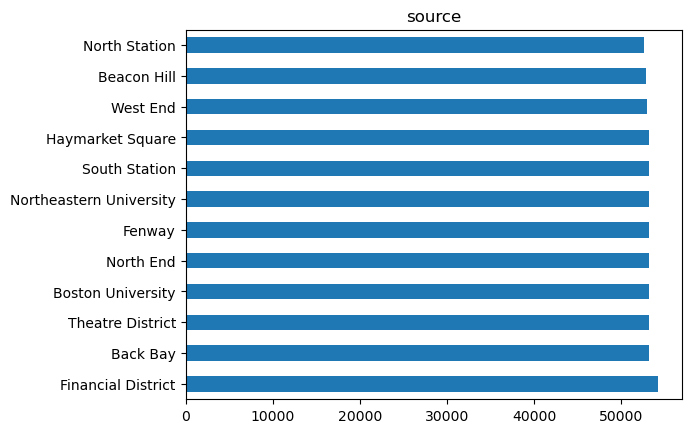

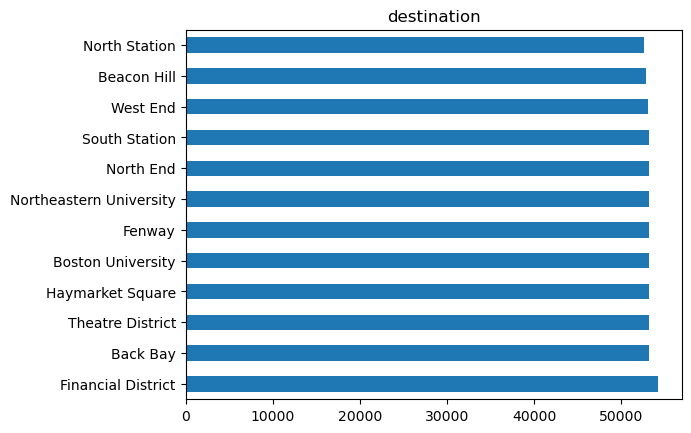

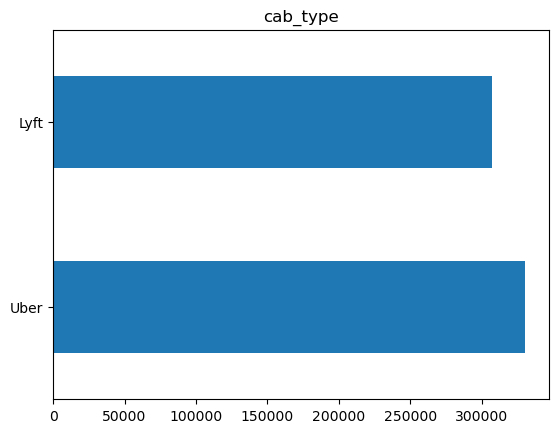

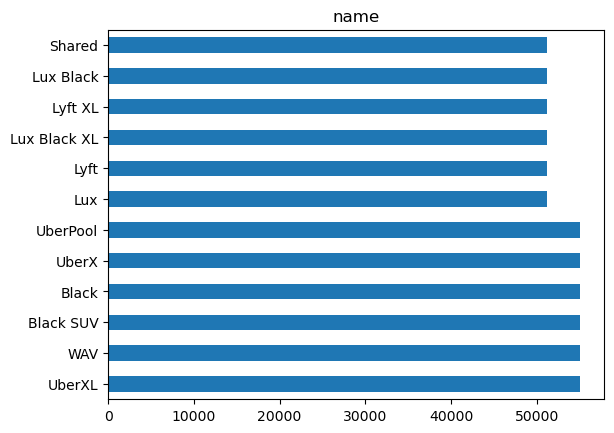

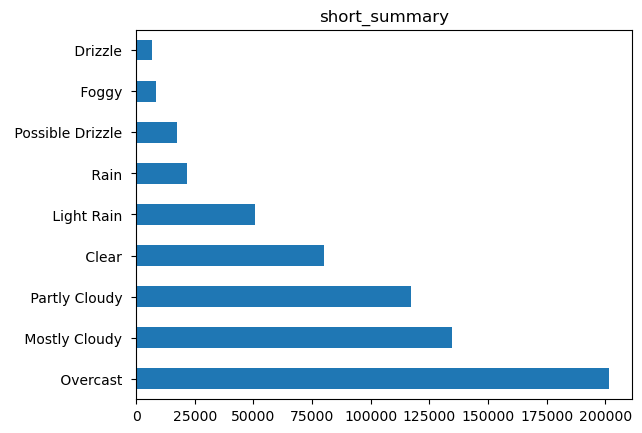

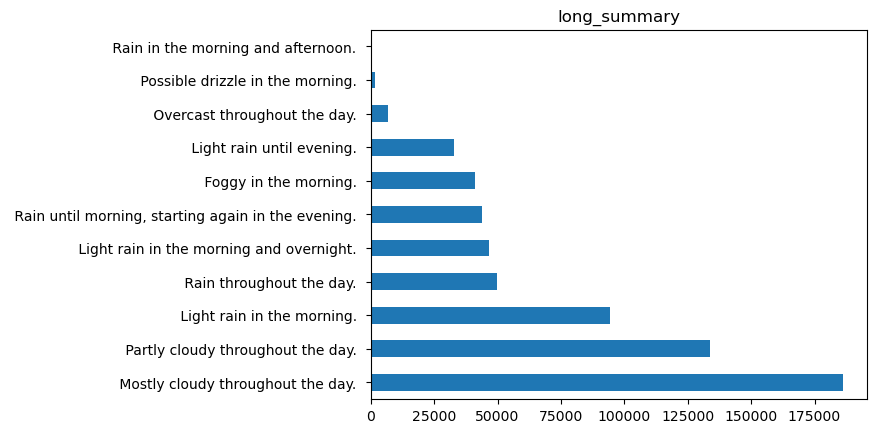

In [10]:
# Define columns with object/categorical data types:
df_categorical = df[['source', 'destination', 'cab_type','name','short_summary','long_summary']]

# Displays the distribution between classes for each attribute:
for column in df_categorical.columns:
    df_categorical[column].value_counts().plot(kind='barh')
    plt.title(column)
    plt.show()

***Insight:** The results above show the distribution of data from each column of categorical type, including:*
- *Source and Destination: Shows 12 names of pick-up and drop-off locations from Uber and Lyft. To distribute the data evenly.*
- *Cab Type: Indicates that Uber is more dominant in total app rides compared to Lyft.*
- Name: *Indicates that the name/vehicle type from Uber is also more dominant than Lyft.*
- Short Summary: *Shows that the data distribution tends to be more abundant when the weather conditions are cloudy.*
- Long Summary: *Same as above, data distribution tends to be more abundant when the weather conditions are cloudy.*

### **6. OUTLIER CHECK**

In this analysis, outliers will be checked. Outliers are values that are outside the norm of other values in the data, in other words these values can become anomalies that can disrupt the performance of the machine learning model later.

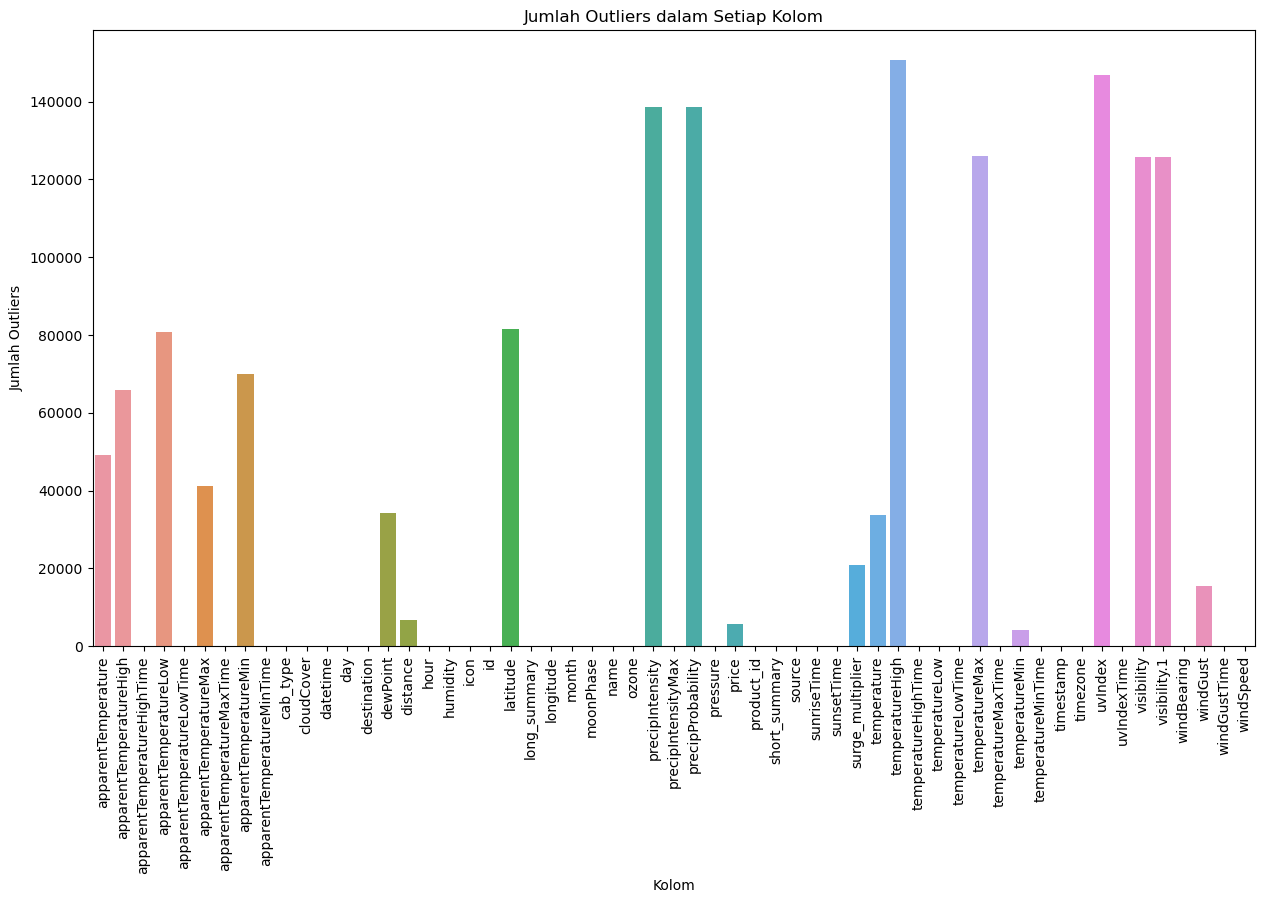

In [11]:
# Use the describe() method to get a statistical summary of the data:
summary = df.describe()

# Calculating IQR (Interquartile Range) limits for detecting outliers:
Q1 = summary.loc['25%']
Q3 = summary.loc['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify columns with outliers:
outliers = ((df < lower_bound) | (df > upper_bound))

# Count the number of outliers in each column:
outliers_count = outliers.sum()

# Displays a visualization of the number of outliers using seaborn:
plt.figure(figsize=(15, 8))
sns.barplot(x=outliers_count.index, y=outliers_count.values)
plt.xticks(rotation=90)
plt.xlabel('Kolom')
plt.ylabel('Jumlah Outliers')
plt.title('Jumlah Outliers dalam Setiap Kolom')
plt.show()

***Insight:** From the results above, it shows that there are several columns that contain outliers in them, including columns related to temperature, weather, etc. Outliers also appear in the dewpoint, distance, price and surge multiplier columns, while the other columns appear safe from outliers. At this stage, no handling of outliers will be carried out, because it could be that outliers make sense of the data.*

---

# **V. FEATURE ENGINEERING**

After carrying out a more in-depth analysis of the data, feature engineering will now be carried out on the data, regarding:
1. *Split Data: train & test*
2. *Encoding: categorical feature column*
3. *Scaling: numeric feature column*
4. *Feature Selection: Check correlation and eliminate unused feature columns*

### **1. DATA SPLIT (TRAIN & TEST)**

After completing the analysis of the data, the data will then be divided into 70% for model training data and 30% for model test data. This is done so that the model is able to learn from training data and make predictions from test data later.

Because from the results of the previous analysis it is known that the target column that will be predicted by the model is 'price', this column will be used as variable 'y', and columns other than that will be used as feature columns in variable 'X' for now.

In [12]:
# Split feature and target columns into X and y:
X = df.drop('price', axis=1)
y = df['price']

# Separating data for train and test:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state=5)

Mengecek shape data dari masing-masing pembagian.

In [13]:
# View the distribution of train and test data:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(446583, 56)
(191393, 56)
(446583,)
(191393,)


***Insight:** From the results above, it shows that the data has been successfully split into Train and Test, along with the number of entries and columns.*

### **2. ENCODING**

After the data has been successfully split, the categorical feature columns must be encoded first so that they can be read by machine learning later.

In [14]:
# Define a feature column of categorical type:
cat_ohe = ['timezone', 'source', 'destination','cab_type', 'product_id', 
            'name', 'short_summary', 'long_summary', 'icon']

# Transform in array form:
enc_ohe = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

# Using the fit method before performing the transformation:
enc_ohe.fit(X_train[cat_ohe])

# Convert categorical values to binary representation:
# The transformation results of the train data and test data are saved to variables: 
X_train_ohe = enc_ohe.transform(X_train[cat_ohe])
X_test_ohe = enc_ohe.transform(X_test[cat_ohe])
X_train_ohe

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

***Insight:** The results above show that the unique value of the categorical feature has changed to binary.*

Gets the list of feature names generated after Encoding.

In [15]:
# Get a list of feature names and define them to variables:
feature_names = enc_ohe.get_feature_names_out(input_features= cat_ohe)

# Define a new dataframe according to the previous encoding:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=feature_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=feature_names)

# Checking changes:
X_train_ohe.head(5)

,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Uber,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


***Insight:** From the results above, it shows that the number of feature columns has increased according to the unique values of each previous categorical column.*

Equating the index between X_train and X_test.

In [16]:
# Equalize indexes before joining:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [17]:
# Checking changes:
X_train.head(2)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,0361f7d2-7cf0-482f-ab8b-6500bfb0d1a6,1.543207e+09,4,26,11,2018-11-26 04:40:55,America/New_York,Boston University,Beacon Hill,Lyft,lyft,Lyft,2.70,1.25,42.3398,-71.0892,41.52,41.52,Overcast,Rain in the morning and afternoon.,0.0,0.0,0.90,0.45,0.87,1543150800,4.159,46.28,1543154400,40.21,1543233600,43.21,1543186800,39.27,1543233600,cloudy,38.76,1014.06,86,1.00,0,4.159,313.0,1543146535,1543180615,0.60,0.1459,1543161600,40.73,1543122000,46.28,1543154400,38.28,1543136400,43.21,1543186800
1,97e69608-e966-44c5-a932-eddca0f960c4,1.543596e+09,16,30,11,2018-11-30 16:43:05,America/New_York,West End,Haymarket Square,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,0.72,1.00,42.3503,-71.0810,40.13,38.00,Clear,Mostly cloudy throughout the day.,0.0,0.0,0.62,3.46,4.47,1543554000,9.920,42.32,1543600800,31.57,1543665600,40.48,1543611600,28.10,1543658400,clear-day,27.99,1016.84,291,0.12,2,9.920,269.9,1543578871,1543612479,0.79,0.0004,1543593600,28.64,1543579200,42.32,1543600800,29.29,1543579200,40.48,1543611600


***Insight:** From the results above it shows that the index between X_train and X_test is the same.*

Because the column has been added after the encoding process, the original encoded column will be removed from the data.

In [18]:
# Delete the initial column whose unique value has been encoded:
X_train_new = pd.concat([X_train, X_train_ohe], axis=1)
X_train_new.drop(columns=['timezone', 'source', 'destination','cab_type', 'product_id', 
                            'name', 'short_summary', 'long_summary', 'icon'], inplace=True)
X_test_new = pd.concat([X_test, X_test_ohe], axis=1)
X_test_new.drop(columns=['timezone', 'source', 'destination','cab_type', 'product_id', 
                            'name', 'short_summary', 'long_summary', 'icon'], inplace=True)
                            
# Checking changes:
X_train_new.head(2)

,id,timestamp,hour,day,month,datetime,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Uber,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,0361f7d2-7cf0-482f-ab8b-6500bfb0d1a6,1.543207e+09,4,26,11,2018-11-26 04:40:55,2.70,1.25,42.3398,-71.0892,41.52,41.52,0.0,0.0,0.90,0.45,0.87,1543150800,4.159,46.28,1543154400,40.21,1543233600,43.21,1543186800,39.27,1543233600,38.76,1014.06,86,1.00,0,4.159,313.0,1543146535,1543180615,0.60,0.1459,1543161600,40.73,1543122000,46.28,1543154400,38.28,1543136400,43.21,1543186800,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,97e69608-e966-44c5-a932-eddca0f960c4,1.543596e+09,16,30,11,2018-11-30 16:43:05,0.72,1.00,42.3503,-71.0810,40.13,38.00,0.0,0.0,0.62,3.46,4.47,1543554000,9.920,42.32,1543600800,31.57,1543665600,40.48,1543611600,28.10,1543658400,27.99,1016.84,291,0.12,2,9.920,269.9,1543578871,1543612479,0.79,0.0004,1543593600,28.64,1543579200,42.32,1543600800,29.29,1543579200,40.48,1543611600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***Insight:** From the results above, it shows that the initial categorical feature column has been successfully deleted and replaced with a unique value from the categorical feature column which has been successfully encoded using One Hot Encoder.*

### **3. SCALING**

After completing the encoding process, the numerical column will be scaled so that the value range becomes the same.

In this section, the numeric column feature will be scaled to a value range between 0-1 using the min max scaler.

In [19]:
# Define the numerical column you want to scale:
num_features = ['timestamp', 'hour', 'day', 'month', 'distance', 'surge_multiplier', 'latitude', 'longitude',
                'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
                'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
                'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow',
                'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
                'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
                'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime',
                'apparentTemperatureMax', 'apparentTemperatureMaxTime']

# Define MinMaxScaler:
mm_scaler = MinMaxScaler()

# Apply scaling then fit and transform:
mm_scaler.fit(X_train_new[num_features])
X_train_new[num_features] = mm_scaler.transform(X_train_new[num_features])
X_train_new.head()

,id,timestamp,hour,day,month,datetime,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Uber,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,0361f7d2-7cf0-482f-ab8b-6500bfb0d1a6,0.001844,0.173913,0.862069,0.0,2018-11-26 04:40:55,0.341837,0.125,0.826173,0.223757,0.590185,0.651807,0.0,0.0,0.896552,0.000000,0.002647,0.000000,0.370785,0.539897,0.000000,0.777739,0.000000,0.595431,0.000000,0.774831,0.000000,0.742653,0.547198,0.237288,1.00,0.0,0.370785,0.398174,0.000000,0.000000,0.607143,1.000000,0.000000,0.913724,0.000000,0.524220,0.000000,0.937323,0.000000,0.504779,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,97e69608-e966-44c5-a932-eddca0f960c4,0.200596,0.695652,1.000000,0.0,2018-11-30 16:43:05,0.089286,0.000,0.895572,0.337017,0.553902,0.573741,0.0,0.0,0.413793,0.206873,0.138752,0.204007,0.991382,0.382692,0.222621,0.477217,0.217391,0.516484,0.215328,0.459650,0.216117,0.509939,0.605773,0.816384,0.12,1.0,0.991382,0.004566,0.217422,0.217336,0.833333,0.002742,0.216998,0.473608,0.220870,0.361658,0.228361,0.618980,0.221622,0.408142,0.220974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ffac53c7-fb37-4b29-b707-e922037bdfdc,0.131799,0.130435,0.965517,0.0,

***Insight:** From the results above, it shows that the values in the numeric feature column have been successfully scaled.*

The scaling process for the X_train data has been completed, now the same thing will be done for X_test.

In [20]:
# Apply scaling to X_test:
X_test_new[num_features]= mm_scaler.transform(X_test_new[num_features])
X_test_new.head()

,id,timestamp,hour,day,month,datetime,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Uber,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,f61479c2-8671-48ed-ab5a-63d0fd2de4ca,0.275562,0.391304,0.034483,1.0,2018-12-02 09:28:03,0.522959,0.000,1.000000,0.584254,0.512399,0.531825,0.212854,1.00,0.948276,0.211684,0.120227,0.306011,0.399009,0.724891,0.315978,0.940174,0.293478,0.799595,0.304745,0.951467,0.296703,0.700519,0.659924,0.344633,1.00,0.0,0.399009,0.016438,0.304386,0.304276,0.916667,0.612748,0.305606,0.756098,0.292174,0.715517,0.324125,0.848796,0.306306,0.754690,0.312734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,a7b2711f-89db-425d-bbe8-d297b4fe9917,0.130168,0.086957,0.965517,0.0,2018-11-29 02:26:07,0.948980,0.000,0.846662,0.070442,0.496215,0.438678,0.000000,0.00,0.568966,0.538144,0.439698,0.142077,0.997953,0.397777,0.141831,0.672000,0.115942,0.409196,0.127737,0.566027,0.115385,0.540838,0.195533,0.855932,0.75,0.0,0.997953,0.726027,0.130456,0.130401,0.750000,0.000000,0.130199,0.654168,0.133913,0.377258,0.145488,0.646955,0.131532,0.276814,0.131086,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,79d1dd9c-cfd0-40c8-aa67-8578c3006054,0.109840,0.652174,0

***Insight:** The results above show that the values in the numerical feature columns 'distance' and 'surge_multiplier' from X_test have been successfully scaled.*

### **4. FEATURE SELECTION**

After completing the encoding process for the categorical column and scaling for the numerical column, the next stage is to carry out feature selection. In this feature selection, a correlation test will be carried out between all existing feature columns and the target column, namely 'price'. The goal is to find which feature columns have strong correlation values with the target column, and feature columns with weak correlation values can be discarded or not used in the machine learning model.

Because we will be conducting a correlation test between the feature column and the target, here we will first perform a join between X and y.

In [21]:
#reset index so that the index value is the same before joining:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [22]:
# Join:
check_corr = pd.concat([X_train_new,y_train],axis=1)
check_corr.head(3)

,id,timestamp,hour,day,month,datetime,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Uber,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain,price
0,0361f7d2-7cf0-482f-ab8b-6500bfb0d1a6,0.001844,0.173913,0.862069,0.0,2018-11-26 04:40:55,0.341837,0.125,0.826173,0.223757,0.590185,0.651807,0.0,0.0,0.896552,0.000000,0.002647,0.000000,0.370785,0.539897,0.000000,0.777739,0.000000,0.595431,0.000000,0.774831,0.000000,0.742653,0.547198,0.237288,1.00,0.0,0.370785,0.398174,0.000000,0.000000,0.607143,1.000000,0.000000,0.913724,0.000000,0.524220,0.000000,0.937323,0.000000,0.504779,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0
1,97e69608-e966-44c5-a932-eddca0f960c4,0.200596,0.695652,1.000000,0.0,2018-11-30 16:43:05,0.089286,0.000,0.895572,0.337017,0.553902,0.573741,0.0,0.0,0.413793,0.206873,0.138752,0.204007,0.991382,0.382692,0.222621,0.477217,0.217391,0.516484,0.215328,0.459650,0.216117,0.509939,0.605773,0.816384,0.12,1.0,0.991382,0.004566,0.217422,0.217336,0.833333,0.002742,0.216998,0.473608,0.220870,0.361658,0.228361,0.618980,0.221622,0.408142,0.220974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2,ffac53c7-fb37-4b29-b707-e922037bdfdc,0.131799,0.13043

Check correlation using Pearson.

In [23]:
# Calculating correlation using Pearson method:
correlation_matrix = check_corr.corr()

# Correlation between all numeric features and the numeric target column:
correlation_with_target = correlation_matrix['price']

print("Korelasi antara fitur dan target:")
print(correlation_with_target)

Korelasi antara fitur dan target:
timestamp                                                            0.000408
hour                                                                 0.000420
day                                                                 -0.001515
month                                                                0.001236
distance                                                             0.345000
surge_multiplier                                                     0.241391
latitude                                                             0.000895
longitude                                                           -0.000941
temperature                                                         -0.000492
apparentTemperature                                                 -0.000370
precipIntensity                                                      0.000938
precipProbability                                                    0.001082
humidity                      

***Insight:** From the results above, it shows that the correlation values are quite strong and the features that can be used are the columns: 'distance', 'surge_multiplier', 'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV'. Columns other than that will not be used at this time.*

Create a function to delete unused feature columns.

In [24]:
# Create function:
def remove_unused_columns_train(X_train_new, columns_to_keep):
    # Remove unnecessary columns from X_train:  
    X_train_filtered = X_train_new[columns_to_keep]
    return X_train_filtered

def remove_unused_columns_test(X_train_new, columns_to_keep):
    # Remove unnecessary columns from X_test:
    X_test_filtered = X_test_new[columns_to_keep]
    return X_test_filtered

# List of columns you want to save:
columns_to_keep = ['distance', 'surge_multiplier', 'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
                    'name_Lyft XL', 'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV']

# Call the function to delete unused columns
X_train_filtered = remove_unused_columns_train(X_train_new, columns_to_keep)
X_test_filtered = remove_unused_columns_test(X_test_new, columns_to_keep)

Checking X_train_filtered and X_test_filtered.

In [25]:
X_train_filtered.columns

Index(['distance', 'surge_multiplier', 'name_Black SUV', 'name_Lux',
       'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL',
       'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL',
       'name_WAV'],
      dtype='object')

In [26]:
X_test_filtered.columns

Index(['distance', 'surge_multiplier', 'name_Black SUV', 'name_Lux',
       'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL',
       'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL',
       'name_WAV'],
      dtype='object')

***Insight:** The results above show that the data has been successfully deleted from each of X_train_filtered and X_test_filtered.*

---

# **VI. MODEL DEFINITION**

In this project the model used is Linear Regression, because I think it is suitable to be applied to targets that have continuous values so that they can predict them.

In [27]:
# Define model:
model_linreg = LinearRegression()

---

# **VII. MODEL TRAINING**

Training the model.

In [28]:
#training the model
model_linreg.fit(X_train_filtered, y_train)

LinearRegression()

---

# **VIII. MODEL EVALUATION**

See the evaluation of the Linear Regression machine learning model that has been previously trained.

### **1. MEAN ABSOLUTE ERROR**

See the MAE evaluation results.

In [29]:
print('-- Train --')
y_train_pred = model_linreg.predict(X_train_filtered)
print('MAE:', mean_absolute_error(y_train, y_train_pred))

print('-- Test --')
y_test_pred = model_linreg.predict(X_test_filtered)
print('MAE:', mean_absolute_error(y_test, y_test_pred))

-- Train --
MAE: 1.7792637238931692
-- Test --
MAE: 1.7731570355494408


***Insight:** From the results above, it shows that the absolute error value is low between Train and Test, which means the model has a good ability to predict prices with a high level of accuracy. However, other evaluations still need to be carried out.*

### **2. MSE & RMSE**

View the MSE and RMSE evaluation results.

In [30]:
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE:',rmse)

MSE: 6.308795258317759
RMSE: 2.5117315259234534


***Insight:** From the results above, it shows that the results of the model are quite good in predicting prices, as evidenced by the small error value.*

### **3. R2 SCORE**

View evaluation results or scores from R2 Score.

In [31]:
print('R2 Score:', r2_score(y_test, y_test_pred))

R2 Score: 0.9275439935081632


***Insight:** From the results above, it shows that with a value of 0.93, the model succeeded in explaining around 93% of the variation in the data, which means that the predictions are almost close to the original data. The higher the R2 number, the better the model is at explaining patterns in the data.*

### **4. SLOPE & INTERCEPT**

Look at the intercept and slope values of the model.

In [32]:
# Print the intercept and slope of the line
print(f"Intercept: {model_linreg.intercept_:.3f}")
print(f"Slope: {model_linreg.coef_[0]:.3f}")

Intercept: 14.465
Slope: 21.883


***Insight:** Can be read in the 'Conceptual Problems' section.*

---

# **IX. MODEL SAVING**

After the model has been successfully run, the functions in feature engineering will be saved so they can be used in other data later.

In [33]:
with open('model_linreg.pkl', 'wb') as file_1:
  joblib.dump(model_linreg, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(mm_scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  joblib.dump(enc_ohe, file_3)

with open('remove_unused_columns_train.pkl', 'wb') as file_4:
  joblib.dump(remove_unused_columns_train, file_4)

In [34]:
with open('list_num_cols.txt', 'w') as file_5:
  json.dump(num_features, file_5)

with open('list_cat_cols_ohe.txt', 'w') as file_6:
  json.dump(cat_ohe, file_6)

with open('columns_to_keep.txt', 'w') as file_7:
  json.dump(columns_to_keep, file_7)

---

# **X. MODEL INFERENCE**

In this section, the model that was previously created and saved will be tried to be applied to new data.

### **1. MODEL LOADING**

Load the model that was saved previously.

In [35]:
# load file
with open('model_linreg.pkl', 'rb') as file_1:
  model_linreg = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('model_encoder.pkl', 'rb') as file_3:
  model_enc = joblib.load(file_3)

with open('remove_unused_columns_train.pkl', 'rb') as file_4:
  remove_unused_columns_train = joblib.load(file_4)

In [36]:
with open('list_num_cols.txt', 'r') as file_5:
  num_cols = json.load(file_5)

with open('list_cat_cols_ohe.txt', 'r') as file_6:
  cat_cols_ohe = json.load(file_6)

with open('columns_to_keep.txt', 'r') as file_7:
  columns_to_keep = json.load(file_7)

Create a new dataframe to test the model.

In [37]:
new_data = pd.DataFrame({
    'id': ["981a3613-77af-4620-a42a-0c0866077g2f", "02b348f2-efbc-4a75-ae9b-14b69b25a7b0", "b9f5e803-9873-4ef3-b0fb-8db575976313"],
    'timestamp': [1543284023.672, 1543284023.672, 1543284023.672],
    'hour': [3, 8, 15],
    'day': [21, 10, 5],
    'month': [9, 5, 11],
    'datetime': ["2018-09-21 03:00:23", "2018-05-10 08:00:23", "2018-11-05 15:00:23"],
    'timezone': ["America/New_York", "America/New_York", "America/New_York"],
    'source': ["North Station", "South Station", "Back Bay"],
    'destination': ["West End", "Financial District", "Fenway"],
    'cab_type': ["Lyft", "Uber", "Lyft"],
    'product_id': ["lyft_plus", "uber_xl", "lyft"],
    'name': ["Lyft XL", "UberXL", "Lyft"],
    'distance': [1.10, 3.20, 0.80],
    'surge_multiplier': [1, 1.5, 1],
    'latitude': [42.3662, 42.3549, 42.3441],
    'longitude': [-71.0632, -71.0551, -71.0982],
    'temperature': [46.84, 63.72, 55.91],
    'apparentTemperature': [44, 61, 53],
    'short_summary': ["Mostly Cloudy", "Rain", "Clear"],
    'long_summary': ["Rain until morning, starting again in the evening.", "Partly cloudy throughout the day.", "Mostly cloudy throughout the day."],
    'precipIntensity': [0, 0.0031, 0.0015],
    'precipProbability': [1, 0.33, 0.15],
    'humidity': [0.92, 0.67, 0.79],
    'windSpeed': [6.75, 12.21, 8.96],
    'windGust': [23.67, 20.08, 15.46],
    'windGustTime': [1543291200, 1543294800, 1543298400],
    'visibility': [3.894, 9.169, 6.135],
    'temperatureHigh': [47.3, 68.45, 58.26],
    'temperatureHighTime': [1545076800, 1545159600, 1545122400],
    'temperatureLow': [34.25, 56.81, 45.09],
    'temperatureLowTime': [1543579200, 1543536000, 1543635600],
    'apparentTemperatureHigh': [43.86, 66.03, 56.12],
    'apparentTemperatureHighTime': [1543438800, 1545108000, 1545118800],
    'apparentTemperatureLow': [38.56, 52.53, 40.97],
    'apparentTemperatureLowTime': [1543478400, 1543604400, 1543561200],
    'icon': ["rain", "partly-cloudy-day", "cloudy"],
    'dewPoint': [44.36, 55.41, 48.09],
    'pressure': [1000.65, 1013.23, 1008.76],
    'windBearing': [147, 124, 163],
    'cloudCover': [0.33, 0.54, 0.72],
    'uvIndex': [1, 5, 3],
    'visibility.1': [9.169, 8.175, 6.926],
    'ozone': [332.2, 329.17, 328.41],
    'sunriseTime': [1543232969, 1547070822, 1541743357],
    'sunsetTime': [1543232969, 1547113288, 1541784003],
    'moonPhase': [0.86, 0.26, 0.95],
    'precipIntensityMax': [0.0221, 0.0266, 0.0193],
    'uvIndexTime': [1543251600, 1545104400, 1545108000],
    'temperatureMin': [28.79, 52.43, 41.07],
    'temperatureMinTime': [1543233600, 1543532400, 1543605600],
    'temperatureMax': [47.06, 71.16, 59.97],
    'temperatureMaxTime': [1543320000, 1545081600, 1545118800],
    'apparentTemperatureMin': [31.4, 48.72, 39.82],
    'apparentTemperatureMinTime': [1544788800, 1543599600, 1543543200],
    'apparentTemperatureMax': [44.15, 68.21, 57.45],
    'apparentTemperatureMaxTime': [1544896800, 1545126000, 1545104400]
})

View the newly created dataframe.

In [38]:
# View data:
new_data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,981a3613-77af-4620-a42a-0c0866077g2f,1.543284e+09,3,21,9,2018-09-21 03:00:23,America/New_York,North Station,West End,Lyft,lyft_plus,Lyft XL,1.1,1.0,42.3662,-71.0632,46.84,44,Mostly Cloudy,"Rain until morning, starting again in the even...",0.0000,1.00,0.92,6.75,23.67,1543291200,3.894,47.30,1545076800,34.25,1543579200,43.86,1543438800,38.56,1543478400,rain,44.36,1000.65,147,0.33,1,9.169,332.20,1543232969,1543232969,0.86,0.0221,1543251600,28.79,1543233600,47.06,1543320000,31.40,1544788800,44.15,1544896800
1,02b348f2-efbc-4a75-ae9b-14b69b25a7b0,1.543284e+09,8,10,5,2018-05-10 08:00:23,America/New_York,South Station,Financial District,Uber,uber_xl,UberXL,3.2,1.5,42.3549,-71.0551,63.72,61,Rain,Partly cloudy throughout the day.,0.0031,0.33,0.67,12.21,20.08,1543294800,9.169,68.45,1545159600,56.81,1543536000,66.03,1545108000,52.53,1543604400,partly-cloudy-day,55.41,1013.23,124,0.54,5,8.175,329.17,1547070822,1547113288,0.26,0.0266,1545104400,52.43,1543532400,71.16,1545081600,48.72,1543599600,68.21,1545126000
2,b9f5e803-9873-4ef3-b0fb-8db575976313,1.543284e+09,15,5,11,2018-11-05 15:00:23,America/New_York,Back Bay,Fenway,Lyft,lyft,Lyft,0.8,1.0,42.3441,-71.0982,55.91,53,Clear,Mostly cloudy throughout the day.,0.0015,0.15,0.79,8.96,15.46,1543298400,6.135,58.26,1545122400,45.09,1543635600,56.12,1545118800,40.97,1543561200,cloudy,48.09,1008.76,163,0.72,3,6.926,328.41,1541743357,1541784003,0.95,0.0193,1545108000,41.07,1543605600,59.97,1545118800,39.82,1543543200,57.45,1545104400


### **2. ENCODING**

Encoding new data.

In [39]:
# Calling categorical columns:
cat_cols_ohe

['timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

In [40]:
# Create a copy of the new data to encode:
data_enc = new_data.copy()

In [41]:
# View data:
data_enc

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,981a3613-77af-4620-a42a-0c0866077g2f,1.543284e+09,3,21,9,2018-09-21 03:00:23,America/New_York,North Station,West End,Lyft,lyft_plus,Lyft XL,1.1,1.0,42.3662,-71.0632,46.84,44,Mostly Cloudy,"Rain until morning, starting again in the even...",0.0000,1.00,0.92,6.75,23.67,1543291200,3.894,47.30,1545076800,34.25,1543579200,43.86,1543438800,38.56,1543478400,rain,44.36,1000.65,147,0.33,1,9.169,332.20,1543232969,1543232969,0.86,0.0221,1543251600,28.79,1543233600,47.06,1543320000,31.40,1544788800,44.15,1544896800
1,02b348f2-efbc-4a75-ae9b-14b69b25a7b0,1.543284e+09,8,10,5,2018-05-10 08:00:23,America/New_York,South Station,Financial District,Uber,uber_xl,UberXL,3.2,1.5,42.3549,-71.0551,63.72,61,Rain,Partly cloudy throughout the day.,0.0031,0.33,0.67,12.21,20.08,1543294800,9.169,68.45,1545159600,56.81,1543536000,66.03,1545108000,52.53,1543604400,partly-cloudy-day,55.41,1013.23,124,0.54,5,8.175,329.17,1547070822,1547113288,0.26,0.0266,1545104400,52.43,1543532400,71.16,1545081600,48.72,1543599600,68.21,1545126000
2,b9f5e803-9873-4ef3-b0fb-8db575976313,1.543284e+09,15,5,11,2018-11-05 15:00:23,America/New_York,Back Bay,Fenway,Lyft,lyft,Lyft,0.8,1.0,42.3441,-71.0982,55.91,53,Clear,Mostly cloudy throughout the day.,0.0015,0.15,0.79,8.96,15.46,1543298400,6.135,58.26,1545122400,45.09,1543635600,56.12,1545118800,40.97,1543561200,cloudy,48.09,1008.76,163,0.72,3,6.926,328.41,1541743357,1541784003,0.95,0.0193,1545108000,41.07,1543605600,59.97,1545118800,39.82,1543543200,57.45,1545104400


Perform encoding.

In [42]:
#implement onehotencoder
data_ohe = model_enc.transform(data_enc[cat_cols_ohe])

# Calling feature name:
feature_names = model_enc.get_feature_names_out(input_features= cat_cols_ohe)
data_ohe = pd.DataFrame(data_ohe, columns=feature_names)

# Data checking:
data_ohe

,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Uber,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Perform a join between the encoded data and the data after encoding, then delete the original categorical column that has been encoded.

In [43]:
# Perform join and drop:
data_new = pd.concat([data_enc, data_ohe], axis=1)
data_new.drop(columns=cat_cols_ohe, inplace=True)

In [44]:
# Data checking:
data_new

,id,timestamp,hour,day,month,datetime,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Uber,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,981a3613-77af-4620-a42a-0c0866077g2f,1.543284e+09,3,21,9,2018-09-21 03:00:23,1.1,1.0,42.3662,-71.0632,46.84,44,0.0000,1.00,0.92,6.75,23.67,1543291200,3.894,47.30,1545076800,34.25,1543579200,43.86,1543438800,38.56,1543478400,44.36,1000.65,147,0.33,1,9.169,332.20,1543232969,1543232969,0.86,0.0221,1543251600,28.79,1543233600,47.06,1543320000,31.40,1544788800,44.15,1544896800,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,02b348f2-efbc-4a75-ae9b-14b69b25a7b0,1.543284e+09,8,10,5,2018-05-10 08:00:23,3.2,1.5,42.3549,-71.0551,63.72,61,0.0031,0.33,0.67,12.21,20.08,1543294800,9.169,68.45,1545159600,56.81,1543536000,66.03,1545108000,52.53,1543604400,55.41,1013.23,124,0.54,5,8.175,329.17,1547070822,1547113288,0.26,0.0266,1545104400,52.43,1543532400,71.16,1545081600,48.72,1543599600,68.21,1545126000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b9f5e803-9873-4ef3-b0fb-8db575976313,1.543284e+09,15,5,11,2018-11-05 15:00:23,0.8,1.0,42.3441,-71.0982,55.91,53,0.0015,0.15,0.79,8.96,15.46,1543298400,6.135,58.26,1545122400,45.09,1543635

***Insight:** The results above show that the new data has been successfully encoded.*

### **3. SCALING**

Scaling new data.

In [45]:
# Scaling against numeric columns:
data_new[num_cols] = model_scaler.transform(data_new[num_cols])
data_new.head()

,id,timestamp,hour,day,month,datetime,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Uber,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,981a3613-77af-4620-a42a-0c0866077g2f,0.041075,0.130435,0.689655,-2.0,2018-09-21 03:00:23,0.137755,0.00,1.000661,0.582873,0.729052,0.706809,0.000000,1.00,0.931034,0.432990,0.864650,0.071038,0.342239,0.580389,0.958707,0.570435,0.173913,0.614228,0.127737,0.754797,0.124542,0.863656,0.264644,0.409605,0.33,0.5,0.910482,0.573516,0.043468,0.026347,0.916667,0.151474,0.045208,0.479068,0.053913,0.556240,0.084715,0.693697,0.827027,0.538053,0.889513,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,02b348f2-efbc-4a75-ae9b-14b69b25a7b0,0.041075,0.347826,0.310345,-6.0,2018-05-10 08:00:23,0.405612,0.25,0.925975,0.694751,1.169668,1.083832,0.021424,0.33,0.500000,0.808247,0.728922,0.072860,0.910482,1.420008,1.000000,1.355130,0.152174,1.255350,0.973844,1.148984,0.188645,1.102420,0.529709,0.344633,0.54,2.5,0.803404,0.545845,1.973525,1.979124,0.202381,0.182317,0.975889,1.339643,0.198261,1.545567,0.985881,1.307011,0.231832,1.389735,1.008739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b9f5e803-9873-4ef3-b0fb-8db575976313,0.041075,0.652174,0

***Insight:** From the results above, it shows that the new data has been successfully scaled.*

### **4. FEATURE SELECTION**

In this feature selection, new data will select the features used by the model and delete the rest.

In [46]:
# Call the function on the new data
data_new_filtered = remove_unused_columns_train(data_new, columns_to_keep)

### **5. MODEL PREDICT**

Run the model against new data.

In [47]:
# Make predictions using the model:
model_linreg.predict(data_new_filtered)

array([11.57528998, 27.70584541,  5.04132564])

***Insight:** The results above show that the model has succeeded in predicting ride-hailing trip fares.*

In [48]:
# Inserting previous results into a new dataframe:
new_data['price'] = model_linreg.predict(data_new_filtered)

In [49]:
# Checking new data:
new_data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price
0,981a3613-77af-4620-a42a-0c0866077g2f,1.543284e+09,3,21,9,2018-09-21 03:00:23,America/New_York,North Station,West End,Lyft,lyft_plus,Lyft XL,1.1,1.0,42.3662,-71.0632,46.84,44,Mostly Cloudy,"Rain until morning, starting again in the even...",0.0000,1.00,0.92,6.75,23.67,1543291200,3.894,47.30,1545076800,34.25,1543579200,43.86,1543438800,38.56,1543478400,rain,44.36,1000.65,147,0.33,1,9.169,332.20,1543232969,1543232969,0.86,0.0221,1543251600,28.79,1543233600,47.06,1543320000,31.40,1544788800,44.15,1544896800,11.575290
1,02b348f2-efbc-4a75-ae9b-14b69b25a7b0,1.543284e+09,8,10,5,2018-05-10 08:00:23,America/New_York,South Station,Financial District,Uber,uber_xl,UberXL,3.2,1.5,42.3549,-71.0551,63.72,61,Rain,Partly cloudy throughout the day.,0.0031,0.33,0.67,12.21,20.08,1543294800,9.169,68.45,1545159600,56.81,1543536000,66.03,1545108000,52.53,1543604400,partly-cloudy-day,55.41,1013.23,124,0.54,5,8.175,329.17,1547070822,1547113288,0.26,0.0266,1545104400,52.43,1543532400,71.16,1545081600,48.72,1543599600,68.21,1545126000,27.705845
2,b9f5e803-9873-4ef3-b0fb-8db575976313,1.543284e+09,15,5,11,2018-11-05 15:00:23,America/New_York,Back Bay,Fenway,Lyft,lyft,Lyft,0.8,1.0,42.3441,-71.0982,55.91,53,Clear,Mostly cloudy throughout the day.,0.0015,0.15,0.79,8.96,15.46,1543298400,6.135,58.26,1545122400,45.09,1543635600,56.12,1545118800,40.97,1543561200,cloudy,48.09,1008.76,163,0.72,3,6.926,328.41,1541743357,1541784003,0.95,0.0193,1545108000,41.07,1543605600,59.97,1545118800,39.82,1543543200,57.45,1545104400,5.041326


***Insight:** From the results above, it shows that the predicted travel price has been entered into the target column.*

---

# **XI. CONCEPTUAL PROBLEMS**

The **Linear Regression** model was chosen because the objective of this project is to predict trip prices on ride-hailing platforms. Linear Regression is a good method for modeling the linear relationship between a dependent variable (price) and one or more independent variables (features that can influence (price), such as travel distance, vehicle type, etc.). In this project, the basic assumption of Linear Regression which assumes a linear relationship between features and targets seems reasonable.

Evaluation Metrics: In this case, some evaluation metrics that can be used to measure model performance are:

- **Mean Squared Error (MSE)**: Measures the average of the squared differences between the predicted value and the actual value. The lower the MSE value, the better the model is at making predictions.
- **Root Mean Squared Error (RMSE)**: This is the root of the MSE and gives an idea of the prediction error in original units. Lower RMSE indicates better performance.
- **R-squared (R2)**: Also known as coefficient of determination, measures how well the variation in the target variable can be explained by the model. The R2 value ranges between 0 and 1, and the closer it is to 1, the better the model explains the variation in the data.

The slope value obtained from the evaluation results of this model is 21,883 and the intercept is 14,465. This value means that the regression results are a straight line with the data centered on the linear regression line. Shows that all the features used successfully determine or predict Uber and Lyft ride fares with a high level of accuracy

---

# **XII. CONCLUSION**

The conclusion is that this Linear Regression model is able to predict ride fares from Uber and Lyft quite well using the distance, surge multiplier, and name features. However, it is possible that if weather features were added, the model could learn patterns more accurately, because in the real world, when it rains, Gojek or Grab fares are usually more expensive than other weather situations.

For future model improvements, it is recommended to try to pay attention to the features mentioned above such as: weather, temperature, source, destination, day, and night, etc. Due to the possibility that these features contain hidden correlations that can influence the prediction results of travel fares. Apart from that, perhaps there could be more checking or evaluation of the model using other supporting metrics, and you should try using other models so that there is a comparison.

---